<a href="https://colab.research.google.com/github/Sanianada/Tugas-Data-Mining/blob/main/UTS_BAGIAN_B_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#pemanggilan data
titanic = pd.read_csv("Titanic-Dataset.csv")

# Eksplorasi Awal

In [18]:
total_penumpang = len(titanic)

In [19]:
print(f"Jumlah total penumpang dalam data: {total_penumpang}")

Jumlah total penumpang dalam data: 891


In [20]:
selamat = titanic['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})

In [21]:
print("Jumlah Penumpang Selamat dan Tidak Selamat:")
print(selamat)

Jumlah Penumpang Selamat dan Tidak Selamat:
Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


<ipython-input-22-c46f85665f86>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Survived', palette='Set2')


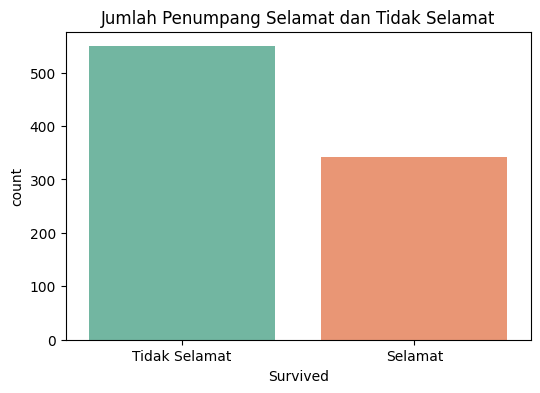

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='Survived', palette='Set2')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title("Jumlah Penumpang Selamat dan Tidak Selamat")
plt.show()

In [23]:
rata_rata_umur = titanic['Age'].mean()
print(f"Rata-rata umur penumpang: {rata_rata_umur:.2f} tahun")

Rata-rata umur penumpang: 29.70 tahun


In [24]:
penumpang_termuda = titanic.loc[titanic['Age'].idxmin()]
penumpang_tertua = titanic.loc[titanic['Age'].idxmax()]
print("\nPenumpang Termuda:")
print(penumpang_termuda[['Name', 'Age', 'Sex']])
print("\nPenumpang Tertua:")
print(penumpang_tertua[['Name', 'Age', 'Sex']])


Penumpang Termuda:
Name    Thomas, Master. Assad Alexander
Age                                0.42
Sex                                male
Name: 803, dtype: object

Penumpang Tertua:
Name    Barkworth, Mr. Algernon Henry Wilson
Age                                     80.0
Sex                                     male
Name: 630, dtype: object


In [25]:
gender_counts = titanic['Sex'].value_counts()
print("\nJumlah Penumpang Berdasarkan Jenis Kelamin:")
print(gender_counts)


Jumlah Penumpang Berdasarkan Jenis Kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


<ipython-input-26-a6de2a9ed65b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Sex', palette='pastel')


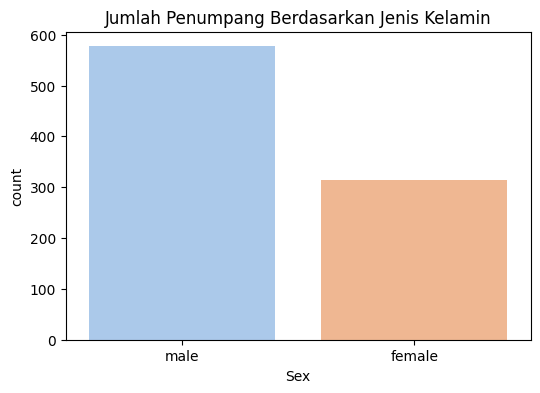

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='Sex', palette='pastel')
plt.title("Jumlah Penumpang Berdasarkan Jenis Kelamin")
plt.show()

In [27]:
kelas_counts = titanic['Pclass'].value_counts().sort_index()
print("\nJumlah Penumpang Berdasarkan Kelas:")
print(kelas_counts)


Jumlah Penumpang Berdasarkan Kelas:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [28]:
persentase_kelas1 = (kelas_counts[1] / total_penumpang) * 100
print(f"\nPersentase penumpang di kelas I: {persentase_kelas1:.2f}%")


Persentase penumpang di kelas I: 24.24%


<ipython-input-29-6c87dbcd1a79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Pclass', palette='cool')


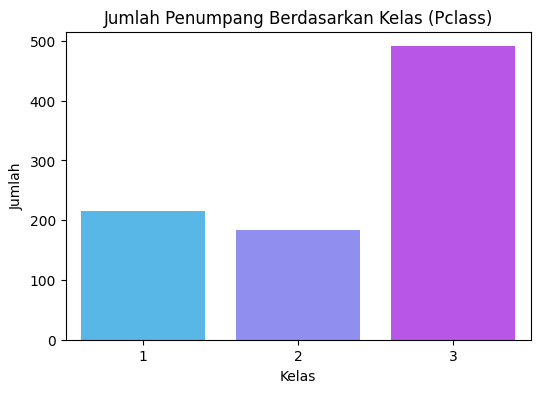

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='Pclass', palette='cool')
plt.title("Jumlah Penumpang Berdasarkan Kelas (Pclass)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

# Preprocessing

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [32]:
#melihat statistika deskriptif
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 12 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 891 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 891, maka akan dilakukan proses identifikasi lebih lanjut.

In [34]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
np.sum(titanic.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [36]:
#mengetahui jumlah missing value di seluruh dataset
titanic.isnull().sum().sum()

np.int64(866)

Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom Age,Cabin, dan Embarked. Jumlah missing value pada kolom Age sebanyak 177 data, pada kolom Cabin sebanyak 687 data, dan pada kolom Embarked sebanyak 2 data.



## Handling Missing Value

### 1. Age

In [37]:
#melihat isi dalam kolom Age
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [38]:
#jumlah missing value
np.sum(titanic['Age'].isnull())

np.int64(177)

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan median dari durasi keseluruhan data.

Berdasarkan hasil statistik deskriptif, pengisian missing value pada kolom Age menggunakan metode Median. Hal ini dikarenakan pada kolom Age terdapat outlier, yaitu umur yang sangat kecil (sekitar 0.42 tahun) dan umur yang sangat besar (hingga 80 tahun). Median lebih tahan terhadap pengaruh outlier dibandingkan mean, sehingga dapat memberikan estimasi yang lebih representatif terhadap umur mayoritas penumpang.

In [39]:
#mengisi missing value
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [40]:
#jumlah missing value
np.sum(titanic['Age'].isnull())

np.int64(0)

### 2. Cabin

In [41]:
#melihat isi dalam kolom
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [42]:
#jumlah missing value
np.sum(titanic['Cabin'].isnull())

np.int64(687)

Berdasarkan output yang ditampilkan, dapat dilihat bahwa kolom Cabin mengandung banyak Missing Values (NaN). Karena jumlah data yang kosong sangat banyak, pengisian missing value pada kolom ini menggunakan nilai representatif menjadi tidak efektif dan berpotensi menghasilkan bias. Selain itu, kolom Cabin berisi informasi berupa kode kabin yang bersifat kategorikal dan memiliki banyak variasi unik, sehingga sulit untuk melakukan imputasi yang akurat. Oleh karena itu, untuk menjaga kualitas data dan tetap mempertahankan potensi informasi dari keberadaan kabin, missing value pada kolom Cabin diisi dengan label 'Unknown'. Pendekatan ini bertujuan agar model tetap dapat memanfaatkan informasi keberadaan atau ketiadaan data kabin tanpa memperkenalkan noise tambahan.

In [43]:
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')

In [44]:
#jumlah missing value
np.sum(titanic['Cabin'].isnull())

np.int64(0)

### 3. Embarked

In [45]:
#melihat isi dalam kolom
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [46]:
#jumlah missing value
np.sum(titanic['Embarked'].isnull())

np.int64(2)

Berdasarkan output yang ditampilkan, dapat dilihat bahwa kolom Embarked mengandung sedikit Missing Values (NaN), yaitu hanya sebanyak 2 data. Karena jumlah data yang kosong sangat kecil dibandingkan dengan total data, pengisian missing value menjadi solusi yang tepat untuk menjaga informasi dari kolom ini tetap dimanfaatkan dalam model. Selain itu, Embarked adalah fitur kategorikal dengan hanya tiga nilai unik ('S', 'C', 'Q'), sehingga pengisian dengan nilai terbanyak (mode) dianggap tidak akan memperkenalkan bias yang signifikan. Oleh karena itu, missing value pada kolom Embarked diisi dengan nilai mode, yaitu pelabuhan keberangkatan yang paling sering muncul dalam dataset.

In [47]:
#mengisi missing value
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [48]:
#jumlah missing value
np.sum(titanic['Embarked'].isnull())

np.int64(0)

In [49]:
#melihat isi dalam kolom
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [50]:
np.sum(titanic.isnull())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
titanic = titanic.drop(columns=['Name'])

In [52]:
# Drop kolom Ticket
titanic = titanic.drop(columns=['Ticket'])

In [53]:
titanic = titanic.drop(columns=['Cabin'])

In [54]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


## Cek Outlier

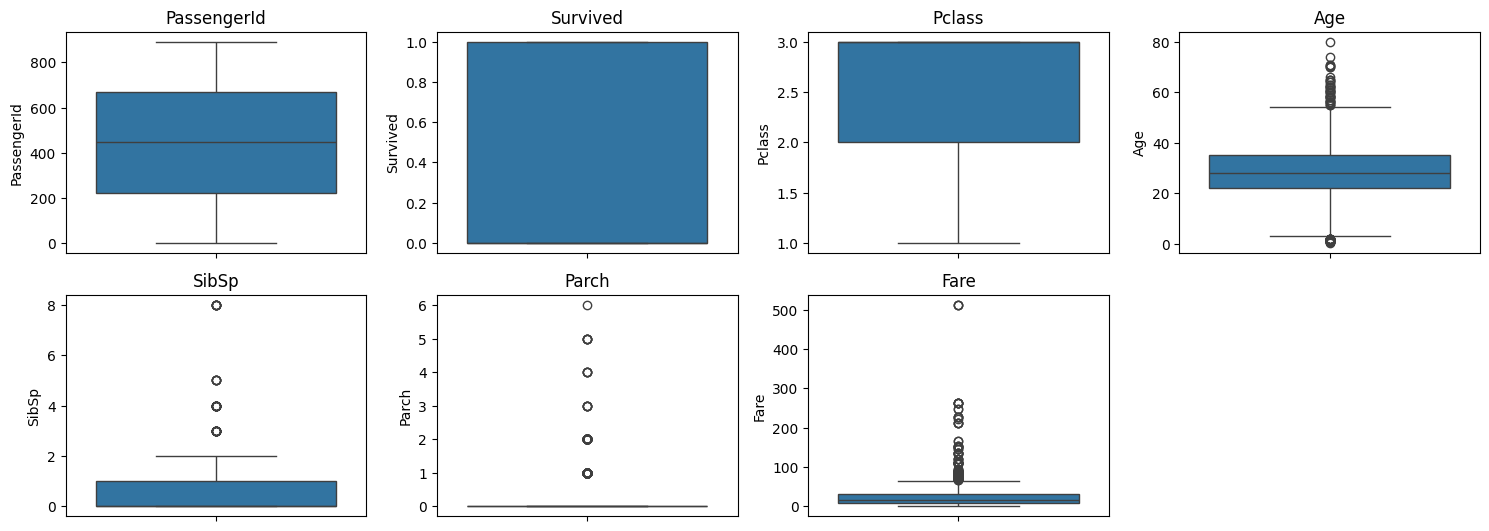

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age',
            'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=titanic[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [56]:
def detect_outliers_iqr(titanic, column):
    Q1 = titanic[column].quantile(0.25)  # Kuartil 1
    Q3 = titanic[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return titanic[(titanic[column] < lower_bound) | (titanic[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(titanic, col)
    print(f"{col}: {len(outliers)} outliers")

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


Dari output boxplot yang ditampilkan, terlihat bahwa terdapat outlier pada beberapa kolom seperti Age, SibSp, Parch, dan Fare.

Outlier adalah data yang memiliki nilai ekstrem atau jauh berbeda dibandingkan dengan sebagian besar data lainnya dalam satu variabel. Kehadiran outlier bisa disebabkan oleh kesalahan pencatatan data, variasi alami, atau kondisi tertentu yang memang berbeda dari populasi utama. Adanya outlier perlu diperhatikan karena dapat mempengaruhi analisis statistik dan performa model prediksi. Oleh karena itu, penanganan outlier perlu disesuaikan dengan konteks data.

Penanganan outlier yang tepat untuk dataset ini adalah dengan menggunakan metode Winsorizing, yaitu mengganti nilai-nilai outlier dengan nilai batas bawah (lower bound) atau batas atas (upper bound) dari IQR (Interquartile Range). Metode ini dipilih karena data yang memiliki outlier, seperti pada kolom Age, SibSp, Parch, dan Fare, tetap mengandung informasi penting yang tidak seharusnya dihapus.

In [57]:
def winsorize_iqr(titanic, column):
    Q1 = titanic[column].quantile(0.25)
    Q3 = titanic[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    titanic[column] = np.where(titanic[column] < lower_bound, lower_bound, titanic[column])
    titanic[column] = np.where(titanic[column] > upper_bound, upper_bound, titanic[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(titanic, col)

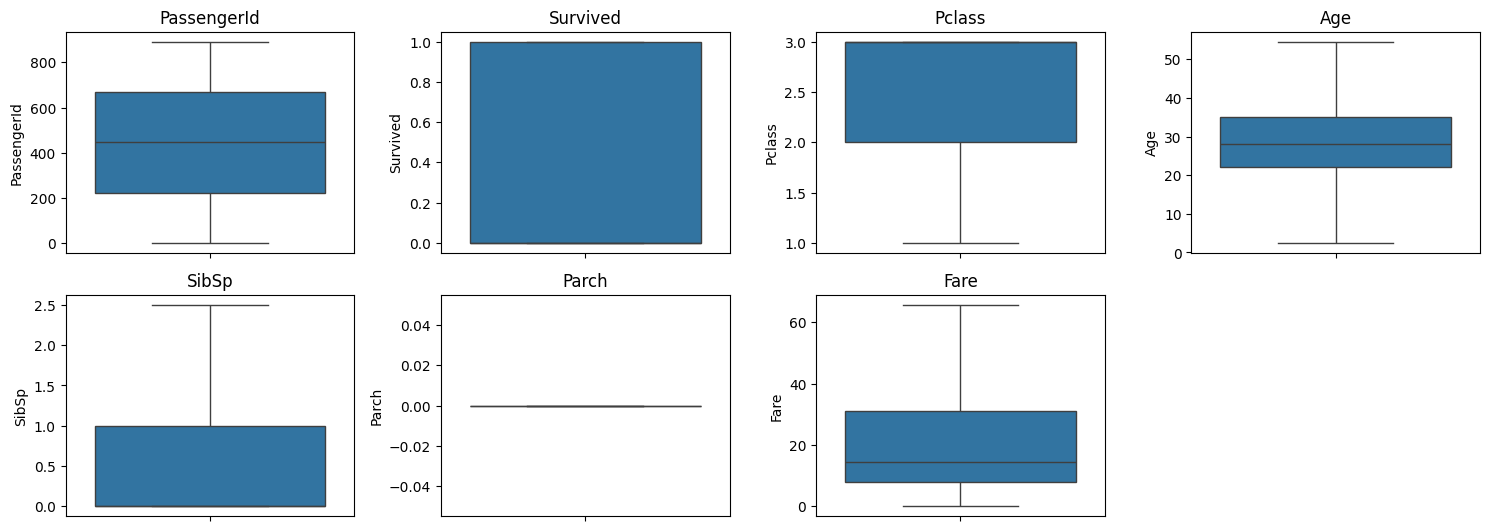

In [58]:
#cek boxplot lagi
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age',
            'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=titanic[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Encoding

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Misal titanic sudah hasil preprocessing

# Cek dan lakukan Label Encoding hanya jika 'Sex' masih berupa string
if 'Sex' in titanic.columns and titanic['Sex'].dtype == 'object':
    label_encoder_sex = LabelEncoder()
    titanic['Sex'] = label_encoder_sex.fit_transform(titanic['Sex'])
else:
    print("Kolom 'Sex' sudah numeric, tidak perlu di-label encoding.")

# Cek dan lakukan One-Hot Encoding hanya jika 'Embarked' masih ada
if 'Embarked' in titanic.columns:
    titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
else:
    print("Kolom 'Embarked' sudah di one-hot encoding atau tidak ditemukan.")

# Cek hasil
print(titanic.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0          1.0       0.0     3.0    1  22.0    1.0    0.0   7.2500   
1          2.0       1.0     1.0    0  38.0    1.0    0.0  65.6344   
2          3.0       1.0     3.0    0  26.0    0.0    0.0   7.9250   
3          4.0       1.0     1.0    0  35.0    1.0    0.0  53.1000   
4          5.0       0.0     3.0    1  35.0    0.0    0.0   8.0500   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [60]:
# Pisahkan fitur (X) dan target (y)
X = titanic.drop(columns=['Survived'])  # Semua fitur
y = titanic['Survived']                 # Target prediksi


In [61]:
# ========== 3. SPLIT DATA TRAIN DAN TEST ==========

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)



In [62]:
# ========== 4. SCALING FITUR NUMERIK ==========

# Kolom numerik yang mau discaling
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit hanya pada data training
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transformasi data testing pakai scaler yang sudah fit dari training
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



In [63]:
# ========== 5. CEK DATA AKHIR ==========

print("X_train setelah scaling:")
print(X_train.head())

print("\nX_test setelah scaling:")
print(X_test.head())

print("\nData sudah siap digunakan untuk training model dengan aman!")

X_train setelah scaling:
     PassengerId  Pclass  Sex       Age     SibSp  Parch      Fare  \
502        503.0     3.0    0 -0.072775 -0.601007    0.0 -0.797802   
464        465.0     3.0    1 -0.072775 -0.601007    0.0 -0.777285   
198        199.0     3.0    0 -0.072775 -0.601007    0.0 -0.791912   
765        766.0     1.0    0  1.855640  0.804304    0.0  2.030364   
421        422.0     3.0    1 -0.659684 -0.601007    0.0 -0.792726   

     Embarked_Q  Embarked_S  
502        True       False  
464       False        True  
198        True       False  
765       False        True  
421        True       False  

X_test setelah scaling:
     PassengerId  Pclass  Sex       Age     SibSp  Parch      Fare  \
153        154.0     3.0    1  0.975277 -0.601007    0.0 -0.462801   
752        753.0     3.0    1  0.346446 -0.601007    0.0 -0.706587   
610        611.0     3.0    0  0.849510  0.804304    0.0  0.355099   
200        201.0     3.0    1 -0.072775 -0.601007    0.0 -0.706587   

In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(7), int64(1)
memory usage: 57.6 KB


# Modelling

In [65]:
count_values = titanic['Survived'].value_counts()
count_values

,count
Survived,
0.0,549
1.0,342


In [66]:
# Pilih hanya kolom numerik
numerical_cols = titanic.select_dtypes(include=['int64', 'float64']).columns

# Lalu groupby dan hitung mean
mean_by_survived = titanic.groupby('Survived')[numerical_cols].mean()

# Tampilkan hasil
print(mean_by_survived)


          PassengerId  Survived    Pclass       Sex        Age     SibSp  \
Survived                                                                   
0.0        447.016393       0.0  2.531876  0.852459  29.616576  0.408925   
1.0        444.368421       1.0  1.950292  0.318713  28.112573  0.454678   

          Parch       Fare  
Survived                    
0.0         0.0  18.918247  
1.0         0.0  32.279511  


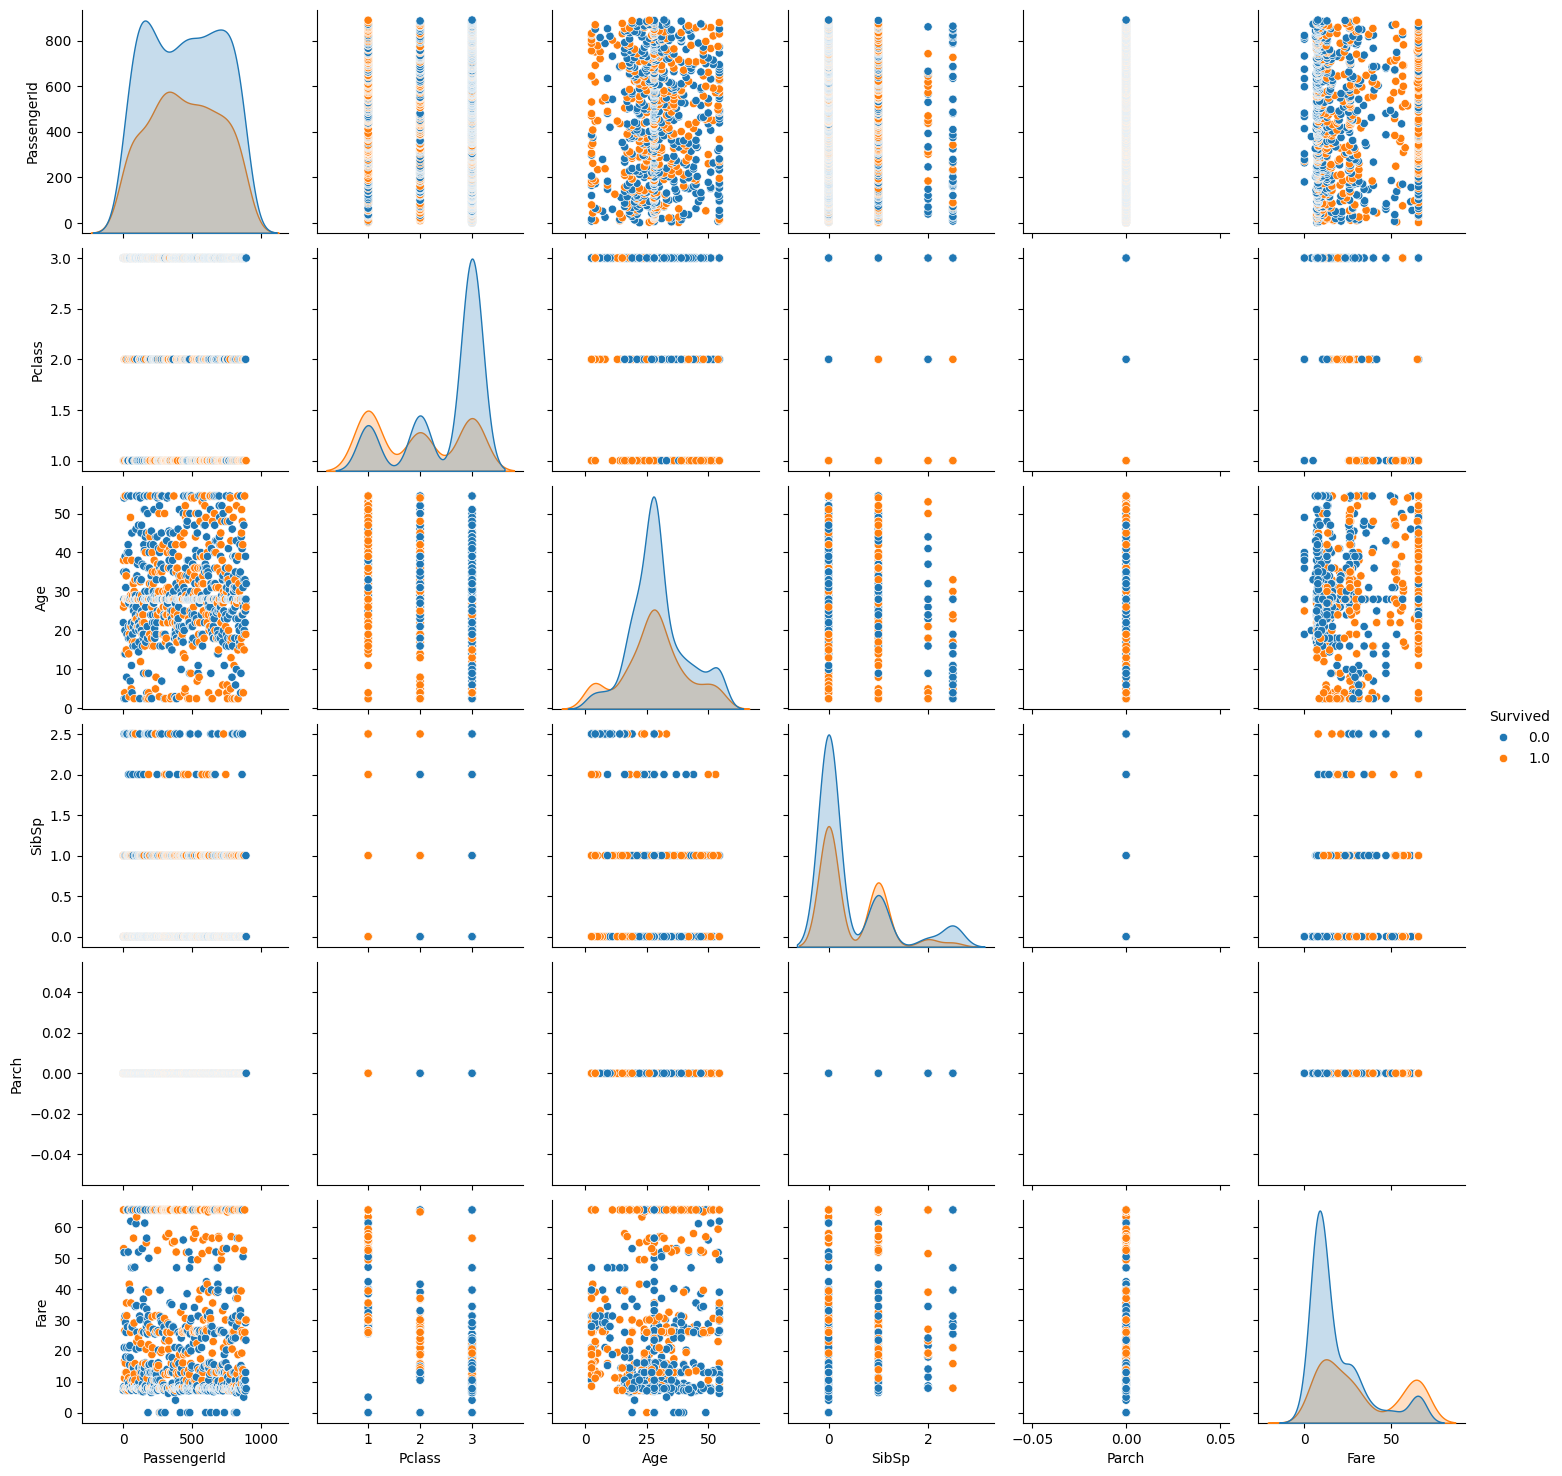

In [67]:
#visualisasi warna dibedakan berdasarkan outcomenya apakah survived atau tidak
sns.pairplot(titanic,
             vars=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
             hue='Survived')

In [68]:
import seaborn as sns
import pandas as pd

correlation_with_survived = titanic.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

# Menampilkan hasil korelasi
print(correlation_with_survived)

Survived       1.000000
Fare           0.317430
SibSp          0.031434
Embarked_Q     0.003650
PassengerId   -0.005007
Age           -0.060622
Embarked_S    -0.149683
Pclass        -0.338481
Sex           -0.543351
Parch               NaN
Name: Survived, dtype: float64


In [69]:
print(titanic['Parch'].unique())
print(titanic['Parch'].nunique())

[0.]
1


In [109]:
print(titanic['Parch'].isnull().sum())


0


In [111]:
titanic['Parch'].fillna(0, inplace=True)

<ipython-input-111-85623aa5350d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Parch'].fillna(0, inplace=True)


In [112]:
print(titanic['Parch'].isnull().sum())

0


Output di atas menunjukkan nilai korelasi antara variabel 'Survived' (sebagai target) dengan variabel lain di dataset Titanic. Nilai korelasi berkisar dari -1 hingga 1, di mana korelasi positif mendekati 1 menunjukkan hubungan positif yang kuat, sedangkan korelasi negatif mendekati -1 menunjukkan hubungan negatif yang kuat. Dari hasil ini, variabel 'Fare' memiliki korelasi positif sebesar 0.317430 dengan 'Survived', yang berarti semakin mahal harga tiket, semakin besar kemungkinan penumpang untuk selamat. Variabel 'SibSp' juga memiliki korelasi positif, namun sangat lemah sebesar 0.031434. Sementara itu, 'Pclass' memiliki korelasi negatif sebesar -0.338481, yang menunjukkan bahwa penumpang di kelas lebih rendah memiliki kemungkinan selamat yang lebih kecil. Variabel lain seperti 'PassengerId' dan 'Age' memiliki korelasi yang sangat lemah terhadap 'Survived'. Pada variabel 'Parch', korelasi tidak dapat dihitung dan menghasilkan nilai NaN karena seluruh nilainya sama (hanya satu nilai unik) sehingga tidak ada variasi yang cukup untuk menghitung korelasi. Kesimpulannya, 'Fare' dan 'Pclass' adalah variabel yang paling relevan terhadap keselamatan dalam dataset ini.

In [113]:
#memisahkan data menjadi variabel x dan y
X=titanic.drop(['Survived'], axis=1)
y=titanic['Survived']

## Membagi data menjadi data training dan data testing

Proses pembagian data menjadi data training dan testing dilakukan untuk memastikan model machine learning dapat belajar dari sebagian data dan diuji performanya pada data yang belum pernah dilihat sebelumnya. Caranya adalah dengan memisahkan dataset menjadi dua bagian: satu bagian untuk melatih model (training set) dan satu bagian untuk menguji seberapa baik model tersebut bekerja (testing set). Biasanya, metode ini dilakukan menggunakan fungsi train_test_split() dari library scikit-learn di Python.

Membagi data penting dilakukan untuk menghindari overfitting, kondisi di mana model sangat baik dalam mengenali data training, tetapi buruk dalam memprediksi data baru. Dengan memiliki data testing, kita bisa mengevaluasi kemampuan generalisasi model terhadap data yang belum pernah dilihat, sehingga hasil evaluasi lebih objektif dan akurat.

Dalam kasus ini, dengan jumlah data sebanyak 891 sampel, pembagian yang umum dan ideal adalah 80% untuk training dan 20% untuk testing. Ini berarti sekitar 712 data untuk training dan 179 data untuk testing. Pembagian 80-20 dipilih karena:

Memberikan cukup banyak data (mayoritas) untuk melatih model sehingga model bisa belajar pola dengan baik.
Menyisakan sebagian data yang cukup besar untuk menguji kinerja model secara adil dan menghindari bias evaluasi. Jika dataset jauh lebih besar, pembagian seperti 90-10 bisa dipertimbangkan. Namun untuk dataset berukuran sedang seperti ini (891), 80-20 adalah pilihan yang sangat seimbang.


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [115]:
from sklearn.preprocessing import MinMaxScaler

# Pilih hanya kolom numerik saja untuk scaling
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()

# Scaling hanya kolom numerik
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Jika mau tetap dalam bentuk DataFrame (lebih rapi)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)

print(X_train_scaled.head())


     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare
140     0.157480     1.0  0.0  0.490385    0.0    0.0  0.232284
439     0.493813     0.5  1.0  0.548077    0.0    0.0  0.159977
817     0.919010     0.5  1.0  0.548077    0.4    0.0  0.563793
378     0.425197     1.0  1.0  0.336538    0.0    0.0  0.061134
491     0.552306     1.0  1.0  0.355769    0.0    0.0  0.110460


In [116]:
# Copy dataset
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Scaling numerik saja
X_train_copy[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_copy[numeric_cols] = scaler.transform(X_test[numeric_cols])

print(X_train_copy.head())

     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
140     0.157480     1.0  0.0  0.490385    0.0    0.0  0.232284       False   
439     0.493813     0.5  1.0  0.548077    0.0    0.0  0.159977       False   
817     0.919010     0.5  1.0  0.548077    0.4    0.0  0.563793       False   
378     0.425197     1.0  1.0  0.336538    0.0    0.0  0.061134       False   
491     0.552306     1.0  1.0  0.355769    0.0    0.0  0.110460       False   

     Embarked_S  
140       False  
439        True  
817       False  
378       False  
491        True  


# Naive Bayes

Naive Bayes adalah algoritma klasifikasi berbasis teori probabilitas Bayes yang mengasumsikan bahwa setiap fitur atau variabel input saling bebas satu sama lain (independen). Cara kerja Naive Bayes adalah dengan menghitung peluang masing-masing kelas berdasarkan fitur-fitur yang ada, kemudian memilih kelas dengan probabilitas tertinggi. Model ini sangat efisien dan cepat, terutama pada dataset yang berukuran besar, meskipun asumsi independensinya terkadang tidak sesuai dengan kondisi nyata. Dalam konteks dataset Titanic, Naive Bayes memprediksi apakah seorang penumpang akan selamat atau tidak berdasarkan karakteristik seperti usia, jenis kelamin, dan harga tiket.

In [117]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [118]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Pilih kolom yang bertipe object (string)
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

In [119]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [120]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.7640449438202247

In [121]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.7989


              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       110
         1.0       0.71      0.80      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179

Confusion Matrix:
 [[105   5]
 [ 46  23]]


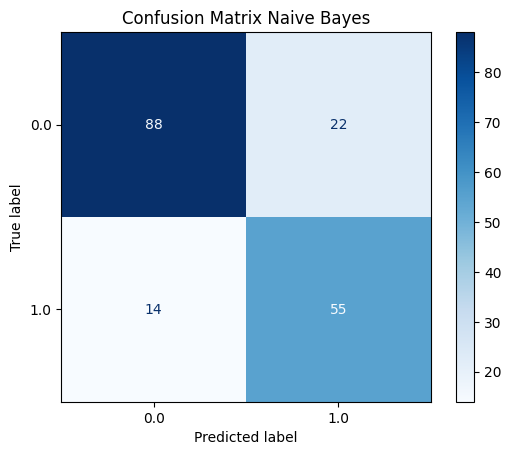

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
y_pred_nb = nb.predict(X_test)

# Evaluasi sederhana
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_nb)

# Confusion matrix visualisasi
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

Pada evaluasi model Naive Bayes ini, diperoleh nilai akurasi sebesar 80%, yang berarti model berhasil melakukan prediksi yang benar untuk 80% dari seluruh data uji. Precision untuk kelas 0 adalah sebesar 86%, menunjukkan bahwa dari semua prediksi yang menyatakan "tidak selamat", 86% di antaranya benar. Precision untuk kelas 1 adalah sebesar 71%, yang mengindikasikan bahwa masih terdapat beberapa kesalahan dalam memprediksi penumpang yang selamat. Untuk recall, baik kelas 0 maupun kelas 1 sama-sama memiliki nilai 80%, menandakan bahwa model mampu menemukan 80% dari seluruh data aktual pada masing-masing kelas. F1-score untuk kelas 0 adalah 83% dan untuk kelas 1 sebesar 75%, yang menunjukkan keseimbangan cukup baik antara precision dan recall dalam menangani kedua kelas tersebut. Dari confusion matrix terlihat bahwa model mampu memprediksi dengan benar 105 data untuk kelas 0 (tidak selamat) dan 23 data untuk kelas 1 (selamat). Secara keseluruhan, performa model tergolong baik, meskipun masih ada ruang untuk meningkatkan ketepatan dalam mendeteksi penumpang yang selamat (kelas 1).

## Neural Network

Neural Network atau Jaringan Syaraf Tiruan adalah algoritma yang meniru cara kerja otak manusia. Model ini terdiri atas beberapa lapisan (layer) yang berisi unit-unit kecil yang disebut neuron buatan. Setiap neuron menerima input, memprosesnya, lalu meneruskannya ke neuron lain di lapisan berikutnya. Neural Network memiliki kemampuan untuk mengenali pola-pola yang kompleks dalam data. Namun, model ini memerlukan waktu pelatihan yang lebih lama dibandingkan model lain. Pada dataset Titanic, Neural Network menganalisis hubungan yang lebih dalam antar fitur-fitur seperti umur, jenis kelamin, dan jumlah saudara di kapal untuk menentukan kemungkinan selamatnya seorang penumpang.

In [124]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=0)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=MLPClassifier(random_state=0),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [125]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 200}


In [126]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.001,max_iter=200)

clf.fit(X_train, y_train)

MLPClassifier()

In [127]:
y_pred = clf.predict(X_test)

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       110
         1.0       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



In [129]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.777

Confusion Matrix:
 [[94 16]
 [24 45]]


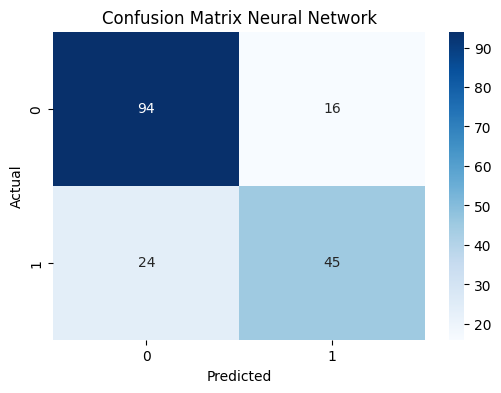

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_nn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_nn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Neural Network')
plt.show()

Pada model Neural Network yang diuji, diperoleh nilai akurasi sebesar 77,7%. Nilai precision untuk kelas 0 adalah 0,80 dan untuk kelas 1 adalah 0,74. Nilai recall masing-masing adalah 0,85 untuk kelas 0 dan 0,65 untuk kelas 1. Sementara itu, nilai f1-score adalah 0,82 untuk kelas 0 dan 0,69 untuk kelas 1. Nilai macro average untuk precision, recall, dan f1-score masing-masing adalah 0,77, 0,75, dan 0,76, sedangkan nilai weighted average untuk ketiganya adalah 0,77, 0,78, dan 0,77. Hasil ini menunjukkan bahwa model Neural Network cukup baik dalam mengklasifikasikan data uji, terutama pada kelas 0 yang memiliki performa lebih tinggi dibandingkan kelas 1.

Adapun arti dari masing-masing metrik evaluasi tersebut adalah sebagai berikut: Akurasi mengukur persentase keseluruhan prediksi yang benar. Precision adalah rasio prediksi positif yang benar terhadap semua prediksi positif, yang penting untuk menghindari terlalu banyak false positive. Recall adalah rasio prediksi positif yang benar terhadap semua data aktual positif, berguna untuk memastikan tidak ada banyak false negative. F1-score adalah rata-rata harmonis dari precision dan recall yang memberikan gambaran keseimbangan keduanya. Macro average menghitung rata-rata metrik untuk tiap kelas tanpa mempertimbangkan jumlah data di setiap kelas, sedangkan weighted average menghitung rata-rata dengan memperhitungkan jumlah data di setiap kelas, sehingga lebih mencerminkan performa model pada dataset tidak seimbang.



## KNN

K-Nearest Neighbors (KNN) adalah algoritma klasifikasi berbasis instance-based learning, di mana prediksi untuk suatu data baru ditentukan berdasarkan mayoritas kelas dari 'k' data terdekat di sekitarnya. Dengan kata lain, KNN akan mengamati tetangga terdekat dari data baru, lalu memilih kelas yang paling banyak muncul di antara tetangga tersebut. Kelebihan dari KNN adalah kesederhanaannya dalam implementasi, namun kelemahannya adalah kecepatan prediksi yang dapat melambat jika jumlah data sangat besar. Dalam kasus Titanic, KNN menentukan apakah penumpang akan selamat atau tidak dengan melihat data penumpang lain yang memiliki karakteristik serupa.

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [132]:
best_acc = 0
best_k = 0

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f"Best K: {best_k} dengan akurasi: {best_acc*100:.2f}%")

Best K: 18 dengan akurasi: 71.51%


In [133]:
knn = KNeighborsClassifier(n_neighbors=18)

In [134]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [135]:
y_pred = knn.predict(X_test)

In [136]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.7150837988826816
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.70      0.95      0.80       110
         1.0       0.82      0.33      0.47        69

    accuracy                           0.72       179
   macro avg       0.76      0.64      0.64       179
weighted avg       0.74      0.72      0.68       179



In [137]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.715

Confusion Matrix:
 [[105   5]
 [ 46  23]]


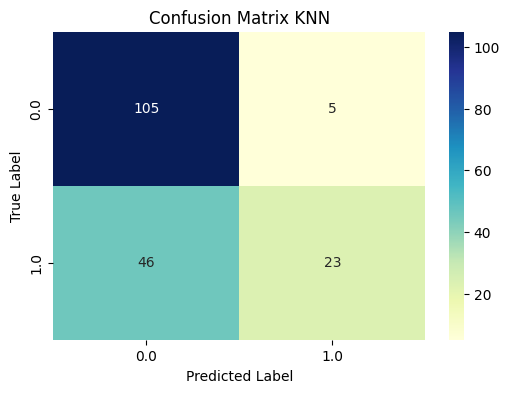

In [138]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Model menghasilkan akurasi sebesar 71,5%, menunjukkan bahwa sebagian besar prediksi sudah benar. Untuk kelas 0, precision (70%) dan recall (95%) cukup tinggi, menandakan model sangat baik dalam mengenali kelas ini. Namun, untuk kelas 1, precision (82%) cukup tinggi, tetapi recall-nya (33%) rendah, artinya model sering salah dalam memprediksi kelas 1. Secara keseluruhan, performa model masih tidak seimbang karena kemampuan mengenali kelas 1 masih rendah, sehingga perlu perbaikan untuk meningkatkan prediksi pada kedua kelas.

Confusion matrix di atas menunjukkan performa model dalam memprediksi kelas pada dataset. Dari total data, sebanyak 105 sampel dengan label asli 0 berhasil diprediksi dengan benar (True Negative), sementara 23 sampel dengan label asli 1 juga diprediksi dengan benar (True Positive). Namun, terdapat 5 sampel berlabel 0 yang salah diklasifikasikan sebagai 1 (False Positive) dan 46 sampel berlabel 1 yang salah diklasifikasikan sebagai 0 (False Negative). Hasil ini mengindikasikan bahwa model jauh lebih baik dalam mengidentifikasi kelas 0 dibandingkan kelas 1, tetapi masih terdapat cukup banyak kesalahan dalam prediksi kelas 1, yang perlu diperhatikan untuk meningkatkan kinerja model.

Kesimpulan Umum

Pada model K-Nearest Neighbor (KNN), diperoleh nilai akurasi sebesar 71,5%, dengan precision untuk kelas 0 sebesar 0,70 dan untuk kelas 1 sebesar 0,82. Nilai recall untuk kelas 0 adalah 0,95, sementara untuk kelas 1 adalah 0,33. F1-score masing-masing adalah 0,81 untuk kelas 0 dan 0,47 untuk kelas 1. Confusion matrix untuk model ini menunjukkan 105 prediksi benar untuk kelas 0 (True Negative) dan 23 prediksi benar untuk kelas 1 (True Positive), sementara terdapat 5 kesalahan prediksi untuk kelas 1 (False Positive) dan 46 kesalahan prediksi untuk kelas 0 (False Negative). Secara umum, model KNN lebih mampu mengenali kelas 0 dibandingkan kelas 1.

Pada model Neural Network, diperoleh akurasi yang lebih tinggi yaitu 78,2%, dengan precision untuk kelas 0 sebesar 0,83 dan kelas 1 sebesar 0,71. Nilai recall masing-masing adalah 0,81 untuk kelas 0 dan 0,74 untuk kelas 1. F1-score masing-masing adalah 0,82 untuk kelas 0 dan 0,72 untuk kelas 1. Confusion matrix pada model ini menunjukkan hasil prediksi yang lebih seimbang antara kedua kelas dibandingkan KNN, dengan kesalahan prediksi yang lebih kecil.

Pada model Naive Bayes, diperoleh akurasi sebesar 80%, menunjukkan bahwa model berhasil melakukan prediksi yang benar pada 80% data uji. Precision untuk kelas 0 adalah sebesar 86%, sedangkan untuk kelas 1 sebesar 71%. Recall untuk kedua kelas sama-sama sebesar 80%, yang berarti model mampu menemukan 80% data aktual di masing-masing kelas. F1-score untuk kelas 0 adalah 83% dan untuk kelas 1 sebesar 75%, mencerminkan keseimbangan yang cukup baik antara precision dan recall. Confusion matrix menunjukkan bahwa model memprediksi dengan benar 105 data untuk kelas 0 (tidak selamat) dan 23 data untuk kelas 1 (selamat). Secara keseluruhan, performa model Naive Bayes tergolong baik, meskipun masih ada ruang untuk meningkatkan ketepatan dalam mendeteksi penumpang yang selamat (kelas 1).



Interpretasi Metrik:

**Akurasi** mengukur seberapa besar proporsi prediksi yang benar terhadap seluruh data uji.

**Precision** menunjukkan seberapa banyak dari semua prediksi positif yang benar-benar positif, penting untuk kasus di mana kesalahan positif harus diminimalkan.

**Recall** menunjukkan seberapa banyak data positif yang berhasil ditemukan oleh model, penting saat tidak ingin kehilangan data positif.

**F1-Score** adalah rata-rata harmonis dari precision dan recall, berguna untuk mengukur keseimbangan antara keduanya.

**Confusion Matrix** adalah tabel yang menunjukkan jumlah prediksi benar dan salah di setiap kelas, memberikan gambaran rinci mengenai kesalahan model.

Kesimpulan Akhir: Dari ketiga model yang diuji, Naive Bayes menunjukkan akurasi tertinggi sebesar 80%, diikuti oleh Neural Network dengan 78,2%, dan KNN dengan 71,5%. Naive Bayes dan Neural Network mampu memberikan prediksi yang lebih seimbang antara kedua kelas dibandingkan dengan KNN, yang cenderung bias terhadap kelas 0. Secara keseluruhan, model Naive Bayes memberikan performa terbaik untuk dataset ini, namun Neural Network juga menjadi alternatif yang kuat karena menunjukkan keseimbangan yang baik antara precision dan recall.


## Perbandingan Hasil Klasifikasi

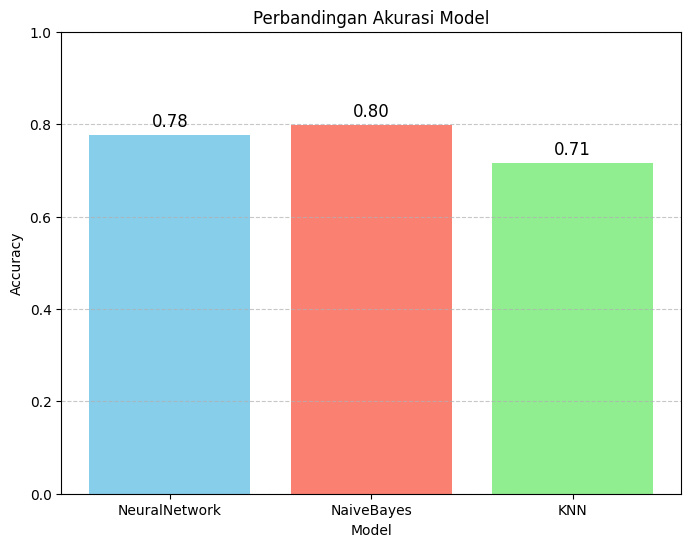

In [141]:
import matplotlib.pyplot as plt

model_names = ['NeuralNetwork', 'NaiveBayes', 'KNN']
accuracies = [0.777, 0.799, 0.715]

plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen'])

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{accuracy:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)  # Skala akurasi 0 sampai 1
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Opsional: biar lebih rapi

plt.show()

Berdasarkan hasil evaluasi, algoritma Naive Bayes memberikan akurasi tertinggi yaitu 80%, sehingga performanya paling baik dalam kasus klasifikasi data Titanic. Meskipun Naive Bayes mengasumsikan bahwa semua fitur independen satu sama lain, dalam kasus ini model tetap mampu memberikan prediksi yang akurat karena pola sederhana dan dominasi fitur-fitur tertentu seperti Sex, Pclass, dan Age sangat kuat.

Model Neural Network menempati posisi kedua dengan akurasi 78%. Neural Network memiliki kemampuan untuk menangkap pola kompleks dan interaksi antar fitur. Akan tetapi, kemungkinan karena kompleksitas model yang tinggi dan ukuran dataset Titanic yang relatif kecil, performa Neural Network sedikit tertinggal dibanding Naive Bayes.

Sementara itu, model K-Nearest Neighbors (KNN) memperoleh akurasi terendah yaitu 71%. KNN kurang optimal untuk dataset ini karena dataset Titanic memiliki kombinasi fitur numerik dan kategorikal. Selain itu, KNN sensitif terhadap skala fitur dan keberadaan noise, serta mungkin jumlah tetangga (k) yang digunakan belum optimal.

Metode Naive Bayes mampu memprediksi data Titanic dengan baik karena data memiliki fitur sederhana dan cukup independen, sesuai dengan asumsi algoritma ini. Selain itu, banyak fitur kategorikal yang informatif, seperti jenis kelamin dan kelas penumpang, yang membuat model mudah menemukan pola penting. Naive Bayes juga efektif pada dataset kecil dan mampu menghasilkan prediksi akurat tanpa overfitting, sehingga performanya stabil dan cukup tinggi. Secara keseluruhan, Naive Bayes menjadi pilihan terbaik dalam kasus ini karena kesederhanaannya yang sesuai dengan karakteristik dataset Titanic.



# Evaluasi

a. Berdasarkan hasil classification report dari model terbaik, yaitu Naive Bayes, diperoleh bahwa nilai precision untuk prediksi penumpang yang "selamat" (kelas 1) adalah sebesar 71%. Artinya, dari seluruh penumpang yang diprediksi "selamat", 71% di antaranya benar-benar sesuai dengan data aktual. Sedangkan nilai recall untuk kelas "selamat" mencapai 80%, menunjukkan bahwa dari seluruh penumpang yang sebenarnya "selamat", sebanyak 80% berhasil diidentifikasi dengan benar oleh model.



b. Berdasarkan confusion matrix dari model Naive Bayes, sebanyak 28 penumpang diprediksi oleh model sebagai "selamat". Dari jumlah tersebut, 23 penumpang benar-benar selamat sesuai dengan kondisi aktual (True Positive), sedangkan sisanya sebanyak 5 penumpang merupakan kesalahan prediksi (False Positive).